# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime as dt
from pprint import pprint
import openweathermapy.core as owm

# Import API key
from api_keys import (google_key, weather_api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_lat_lng = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name + ","+ citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Build the endpoint URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Set up arrays
weather_city = []
temp = []
cloud = []
country = []
date = []
humid = []
lat = []
lng = []
max_temp = []
wind = []
i = 0

print ("Beginning Data Retrieval")
print ("-----------------------------")
       
# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        temp.append(response['main']['temp'])
        weather_city.append(city)
        cloud.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humid.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind.append(response["wind"]["speed"]) 
        i += 1
        print("Processing Record " + str(i) + " | " + city)
    except KeyError:
        print ("City not found. Skipping...")

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 1 | nanortalik,gl
City not found. Skipping...
Processing Record 2 | faanui,pf
Processing Record 3 | bambous virieux,mu
Processing Record 4 | rikitea,pf
Processing Record 5 | ushuaia,ar
Processing Record 6 | jacareacanga,br
Processing Record 7 | zhanaozen,kz
Processing Record 8 | oyon,pe
Processing Record 9 | mahebourg,mu
Processing Record 10 | yanam,in
Processing Record 11 | udayagiri,in
Processing Record 12 | punta arenas,cl
Processing Record 13 | san ramon,bo
Processing Record 14 | butaritari,ki
Processing Record 15 | kavieng,pg
Processing Record 16 | hithadhoo,mv
Processing Record 17 | lebu,cl
Processing Record 18 | mareeba,au
Processing Record 19 | estevan,ca
Processing Record 20 | albany,au
Processing Record 21 | verkhoyansk,ru
Processing Record 22 | hobart,au
Processing Record 23 | mataro,es
Processing Record 24 | zhenjiang,cn
Processing Record 25 | vaini,to
Processing Record 26 |

Processing Record 209 | atar,mr
Processing Record 210 | peniche,pt
City not found. Skipping...
Processing Record 211 | raudeberg,no
Processing Record 212 | hare bay,ca
Processing Record 213 | pasighat,in
Processing Record 214 | haines junction,ca
Processing Record 215 | kondinskoye,ru
Processing Record 216 | bubaque,gw
City not found. Skipping...
Processing Record 217 | sainte-suzanne,re
Processing Record 218 | mandalgovi,mn
Processing Record 219 | ha giang,vn
Processing Record 220 | nchelenge,zm
Processing Record 221 | acapulco,mx
Processing Record 222 | ahipara,nz
Processing Record 223 | necochea,ar
Processing Record 224 | yar-sale,ru
Processing Record 225 | hazleton,us
City not found. Skipping...
Processing Record 226 | bonavista,ca
Processing Record 227 | horasan,tr
City not found. Skipping...
Processing Record 228 | saint george,bm
Processing Record 229 | vao,nc
City not found. Skipping...
Processing Record 230 | fujin,cn
Processing Record 231 | teknaf,bd
Processing Record 232 | l

Processing Record 411 | tarata,pe
City not found. Skipping...
City not found. Skipping...
Processing Record 412 | baoro,cf
Processing Record 413 | severo-kurilsk,ru
Processing Record 414 | campamento,co
Processing Record 415 | brae,gb
Processing Record 416 | shumskiy,ru
Processing Record 417 | san andres,co
Processing Record 418 | santa isabel do rio negro,br
Processing Record 419 | alofi,nu
Processing Record 420 | maple creek,ca
Processing Record 421 | gazanjyk,tm
City not found. Skipping...
Processing Record 422 | youhao,cn
Processing Record 423 | sungaipenuh,id
Processing Record 424 | jardim,br
City not found. Skipping...
Processing Record 425 | koslan,ru
Processing Record 426 | port-gentil,ga
City not found. Skipping...
Processing Record 427 | irituia,br
Processing Record 428 | bull savanna,jm
Processing Record 429 | gamboma,cg
Processing Record 430 | partenit,ua
Processing Record 431 | sao joao da barra,br
Processing Record 432 | duminichi,ru
Processing Record 433 | sola,vu
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# response = requests.get(query_url + "Miami").json()
# pprint(response)

In [5]:

summary_df = pd.DataFrame({"City": weather_city,
                           "Temp": temp,
                           "Cloudiness":cloud,
                           "Country": country,
                           "Date": date,
                           "Humidity": humid,
                           "Lat": lat,
                           "Lng": lng,
                           "Max Temp":max_temp,
                           "Wind Speed": wind
                          })
summary_df.to_csv("output_data_file", encoding="utf-8", index=False)
summary_df.head()

,City,Temp,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,"nanortalik,gl",-3.00,76,GL,1553048231,100,60.14,-45.24,-3.00,11.07
1,"faanui,pf",28.61,68,PF,1553048231,100,-16.48,-151.75,28.61,2.52
2,"bambous virieux,mu",26.14,40,MU,1553048043,78,-20.34,57.76,27.00,5.10
3,"rikitea,pf",25.36,0,PF,1553048231,100,-23.12,-134.97,25.36,9.67
4,"ushuaia,ar",10.00,40,AR,1553043600,66,-54.81,-68.31,10.00,3.10


In [6]:
date = summary_df["Date"][0]
year = dt.utcfromtimestamp(date).year
month = dt.utcfromtimestamp(date).month
day = dt.utcfromtimestamp(date).day

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

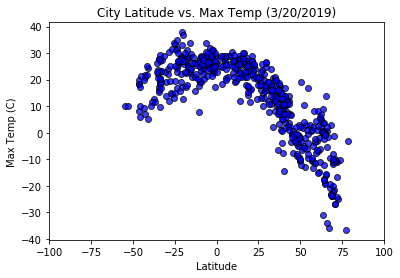

In [12]:
# SCATTER PLOTS - Showing relationships between two sets of data

plt.scatter(summary_df["Lat"], summary_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Max Temp (" + str(month) + "/" + str(day) + "/"+ str(year) + ")")
plt.xlim(-100,100)

plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")


# Save the figure
plt.savefig("Max_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

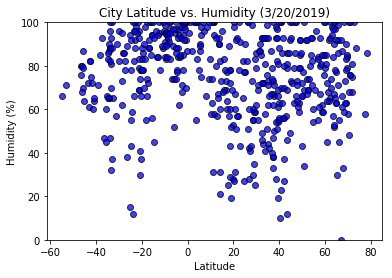

In [11]:
# SCATTER PLOTS - Showing relationships between two sets of data

plt.scatter(summary_df["Lat"], summary_df["Humidity"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Humidity (" + str(month) + "/" + str(day) + "/"+ str(year) + ")")
plt.ylim(0,100)

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


# Save the figure
plt.savefig("Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

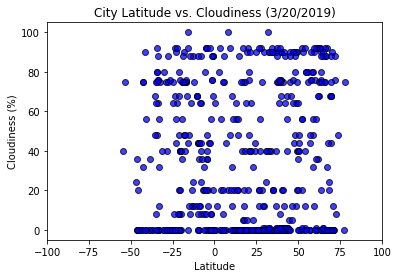

In [13]:
# SCATTER PLOTS - Showing relationships between two sets of data

plt.scatter(summary_df["Lat"], summary_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness (" + str(month) + "/" + str(day) + "/"+ str(year) + ")")
plt.xlim(-100,100)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

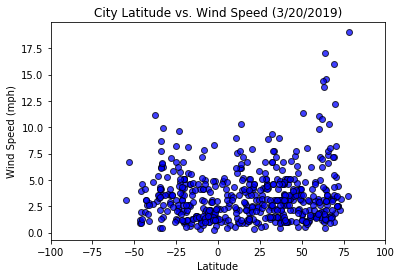

In [14]:
# SCATTER PLOTS - Showing relationships between two sets of data

plt.scatter(summary_df["Lat"], summary_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed (" + str(month) + "/" + str(day) + "/"+ str(year) + ")")
plt.xlim(-100,100)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


# Save the figure
plt.savefig("Wind_Speed.png")
plt.show()